# Imports

In [12]:
import sys
import os
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt

import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

%matplotlib inline

# Constants

In [13]:
TRAIN_PATH = 'datasets/train.csv'
TEST_PATH = 'datasets/test.csv'

# Reading Test Data

In [14]:
df_train = pd.read_csv(TRAIN_PATH)
df_train

,Tweet,following,followers,actions,is_retweet,location,Type,Unnamed: 7
0,Good Morning Love @LeeBrown_V,0.0,0.0,0.0,0.0,"Pennsylvania, USA",Quality,NaN
1,'@realDonaldTrump @USNavy RIP TO HEROES',42096.0,61060.0,5001.0,0.0,"South Padre Island, Texas",Spam,NaN
2,Haven't been following the news but I understa...,0.0,0.0,NaN,0.0,Will never be broke ever again,Quality,NaN
3,pic.twitter.com/dy9q4ftLhZ What to do with pap...,0.0,0.0,0.0,0.0,Mundo,Quality,NaN
4,#DidYouKnow ► Mahatma Gandhi made a brief visi...,17800.0,35100.0,NaN,0.0,"Nottingham, England",Quality,NaN
...,...,...,...,...,...,...,...,...
14894,"#AllWentWrongWhen I told my hair stylist to ""g...",695.0,533.0,868.0,1.0,United States,Spam,NaN
14895,"They don't have to like you, and you don't hav...",0.0,0.0,0.0,0.0,NaN,Quality,NaN
14896,#Miami Graham Nash Live at Parker Playhouse #...,5647.0,15091.0,5823.0,0.0,United States,Spam,NaN
14897,@bethannhamilton is in the business of one-upp...,0.0,0.0,NaN,0.0,"Southgate, MI",Quality,NaN


# Data Visualization

In [15]:
# Get Number of Quality Tweets
is_quality = df_train['Type'] == 'Quality'
df_train_quality = df_train[is_quality]
print('num_quality:', df_train_quality.size)

# Get Number of Spam Tweets
is_spam = df_train['Type'] == 'Spam'
df_train_spam = df_train[is_spam]
print('num_spam:', df_train_spam.size)

num_quality: 59632
num_spam: 59544


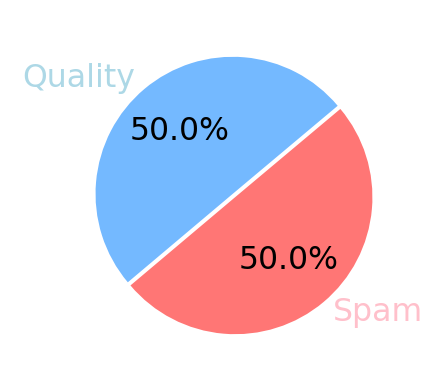

In [16]:
# Creating Pie Chart
category_names = ['Quality', 'Spam']
sizes = [df_train_quality.size, df_train_spam.size]
custom_colors = ['#74b9ff','#ff7675']

plt.figure(figsize=(2, 2), dpi=227)
wedges, labels, percents = plt.pie(sizes, labels=category_names, textprops={'fontsize': 10}, 
                                   startangle=40, autopct='%1.1f%%', colors=custom_colors, 
                                    explode=[0, 0.03])

# label colors
labels[0].set_color('lightblue')
labels[1].set_color('pink')
    
# display pie chart
plt.show()

# Natural Language Processing

1. Convert to lowercase
2. Tokenizing
3. Removing stop words
4. Remove formatting
5. Word Stemming
6. Remove punctuation

# download the NLTK resources (tokenizer & stop words)

tokenizing means splitting up a words in a sentence into individual words

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/alexpena/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [18]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexpena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Tokenizing

In [19]:
msg = 'CSC845 test sentence for team Heavily Caffeinated'
word_tokenize(msg.lower())

['csc845', 'test', 'sentence', 'for', 'team', 'heavily', 'caffeinated']

# Removing Stop Words

In [20]:
stop_words = set(stopwords.words('english'))

In [45]:
from functools import reduce
stemmer = PorterStemmer()

msg = 'created CSC845 test sentence for team Heavily Caffeinated. I like pie.'
words = word_tokenize(msg.lower())

# using reduce
filtered_words = reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])
filtered_words

['creat', 'test', 'sentenc', 'team', 'heavili', 'caffein', 'like', 'pie']

# Functions for Tweet Processing

In [46]:
''' Defining clean_message '''
def clean_message(message, stemmer=PorterStemmer(), stop_words=set(stopwords.words('english'))):
    words = word_tokenize(message.lower())
    return reduce(lambda a,b: a + [stemmer.stem(b)] if b not in stop_words and b.isalpha() else a, words, [])

In [47]:
''' testing function '''

clean_message(msg)


['creat', 'test', 'sentenc', 'team', 'heavili', 'caffein', 'like', 'pie']